<a href="https://colab.research.google.com/github/Yonaki97/DataScience/blob/main/LogikaFuzzy_HREmployee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skfuzzy as fuzz

In [ ]:
df = pd.read_excel("Fuzzy.xlsx")
df.head()

,AGE,BusinessTravel,HourlyRate,OverTime,Attrition
0,35,4,30,6,0
1,37,3,30,5,0
2,35,1,30,7,1
3,51,1,30,5,0
4,54,0,30,8,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [ ]:
df =pd.read_excel("Fuzzy.xlsx")
df.head()

,AGE,BusinessTravel,HourlyRate,OverTime,Attrition
0,35,4,30,6,0
1,37,3,30,5,0
2,35,1,30,7,1
3,51,1,30,5,0
4,54,0,30,8,1


In [ ]:
# Semesta Pembicaraan
x_Age = np.arange(22,61,1)
x_Bt  = np.arange(2,9,1)
x_Hr = np.arange(30,81,1)
x_Ot = np.arange(5,11,1)
x_Attr = np.arange(0, 1.1, 0.1)

In [ ]:
# Membership function

# Age
age_junior = fuzz.trapmf(x_Age, [0, 0, 22, 32])
age_junior_senior = fuzz.trimf(x_Age, [30, 35, 40])
age_senior = fuzz.trapmf(x_Age, [38, 45, 60, 60])

# BusinessTravel
bt_rarely     = fuzz.trapmf(x_Bt, [2, 2, 3, 5])
bt_frequently = fuzz.trapmf(x_Bt, [3, 5, 8, 8])

# Hourlyrate
hr_low  = fuzz.trapmf(x_Hr, [30, 30, 40, 60])
hr_high = fuzz.trapmf(x_Hr, [50, 65, 80, 80])

# Overtime
ot_no  = fuzz.trapmf(x_Ot, [5, 5, 6, 8])
ot_yes = fuzz.trapmf(x_Ot, [6, 8, 10, 10])

#Atrition
attr_stay  = fuzz.trapmf(x_Attr, [0, 0, 0.3, 0.5])   # kemungkinan tetap
attr_leave = fuzz.trapmf(x_Attr, [0.5, 0.7, 1, 1])   # kemungkinan keluar

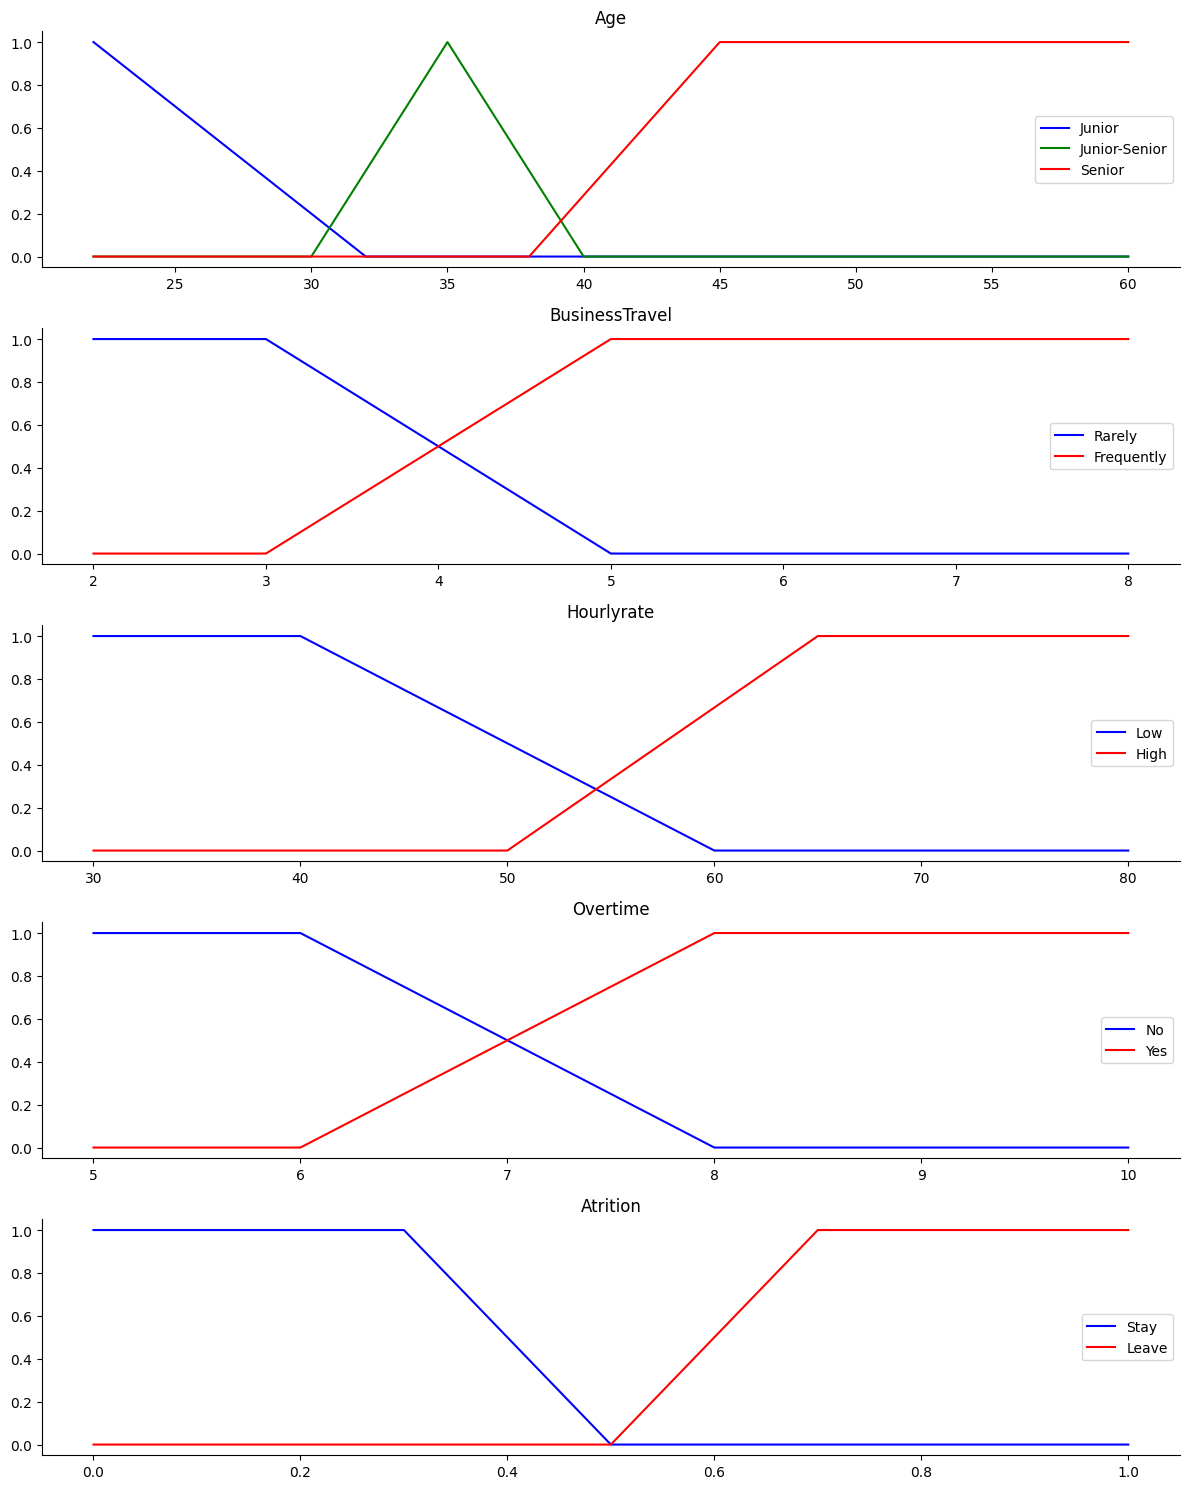

In [ ]:
# Kurva Membership function
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(12, 15))

# Grafik Gaji
ax0.plot (x_Age, age_junior, 'b', linewidth=1.5, label='Junior')
ax0.plot (x_Age, age_junior_senior, 'g', linewidth=1.5, label='Junior-Senior')
ax0.plot (x_Age, age_senior, 'r', linewidth=1.5, label='Senior')
ax0.set_title('Age')
ax0.legend()

# Grafik BusinessTravel
ax1.plot (x_Bt, bt_rarely, 'b', linewidth=1.5, label='Rarely')
ax1.plot (x_Bt, bt_frequently, 'r', linewidth=1.5, label='Frequently')
ax1.set_title('BusinessTravel')
ax1.legend()

# Grafik Hourlyrate
ax2.plot (x_Hr, hr_low, 'b', linewidth=1.5, label='Low')
ax2.plot (x_Hr, hr_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Hourlyrate')
ax2.legend()

# Grafik Overtime
ax3.plot (x_Ot, ot_no, 'b', linewidth=1.5, label='No')
ax3.plot (x_Ot, ot_yes, 'r', linewidth=1.5, label='Yes')
ax3.set_title('Overtime')
ax3.legend()

# Grafik Atrition
ax4.plot (x_Attr, attr_stay, 'b', linewidth=1.5, label='Stay')
ax4.plot (x_Attr, attr_leave, 'r', linewidth=1.5, label='Leave')
ax4.set_title('Atrition')
ax4.legend()

for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
# Fungsi Keanggotaan Age
def FungsiKeanggotaan_Age(_nilai):
    Junior = fuzz.interp_membership(x_Age, age_junior, _nilai)
    Junior_Senior = fuzz.interp_membership(x_Age, age_junior_senior, _nilai)
    Senior = fuzz.interp_membership(x_Age, age_senior, _nilai)
    return Junior, Junior_Senior, Senior

# Fungsi Keanggotaan BusinessTravel
def FungsiKeanggotaan_Bt(_nilai):
    Rarely = fuzz.interp_membership(x_Bt, bt_rarely, _nilai)
    Frequently = fuzz.interp_membership(x_Bt, bt_frequently, _nilai)
    return Rarely, Frequently

# Fungsi Keanggotaan HourlyRate
def FungsiKeanggotaan_Hr(_nilai):
    Low = fuzz.interp_membership(x_Hr, hr_low, _nilai)
    High = fuzz.interp_membership(x_Hr, hr_high, _nilai)
    return Low, High

# Fungsi Keanggotaan Overtime
def FungsiKeanggotaan_Ot(_nilai):
    No = fuzz.interp_membership(x_Ot, ot_no, _nilai)
    Yes = fuzz.interp_membership(x_Ot, ot_yes, _nilai)
    return No, Yes

# Fungsi Keanggotaan Atrition
def FungsiKeanggotaan_Attr(_nilai):
    Stay = fuzz.interp_membership(x_Attr, attr_stay, _nilai)
    Leave = fuzz.interp_membership(x_Attr, attr_leave, _nilai)
    return Stay, Leave

In [ ]:
# Input data
age_val = 45
bt_val = 6
hr_val = 40
ot_val = 9

In [ ]:
# menghitung Fungsi Keanggotaan
age_j, age_js, age_s = FungsiKeanggotaan_Age(age_val)
print(age_js)
bt_r, bt_f = FungsiKeanggotaan_Bt(bt_val)
print(bt_f)
hr_l, hr_h = FungsiKeanggotaan_Hr(hr_val)
print(hr_l)
ot_n, ot_y = FungsiKeanggotaan_Ot(ot_val)
print(ot_y)

0.0
1.0
1.0
1.0


In [ ]:
def fuzzy_predict(age_val, bt_val, hr_val, ot_val):
    # Hitung derajat keanggotaan
    age_j, age_js, age_s = FungsiKeanggotaan_Age(age_val)
    bt_r, bt_f = FungsiKeanggotaan_Bt(bt_val)
    hr_l, hr_h = FungsiKeanggotaan_Hr(hr_val)
    ot_n, ot_y = FungsiKeanggotaan_Ot(ot_val)

    # Inisialisasi list output
    outputs = []

    # Daftar semua rule
    rules = [
        (age_j, bt_r, hr_l, ot_n, attr_leave),
        (age_j, bt_r, hr_l, ot_y, attr_leave),
        (age_j, bt_r, hr_h, ot_n, attr_stay),
        (age_j, bt_r, hr_h, ot_y, attr_leave),
        (age_j, bt_f, hr_l, ot_n, attr_leave),
        (age_j, bt_f, hr_l, ot_y, attr_leave),
        (age_j, bt_f, hr_h, ot_n, attr_leave),
        (age_j, bt_f, hr_h, ot_y, attr_leave),
        (age_js, bt_r, hr_l, ot_n, attr_leave),
        (age_js, bt_r, hr_l, ot_y, attr_leave),
        (age_js, bt_r, hr_h, ot_n, attr_stay),
        (age_js, bt_r, hr_h, ot_y, attr_stay),
        (age_js, bt_f, hr_l, ot_n, attr_leave),
        (age_js, bt_f, hr_l, ot_y, attr_leave),
        (age_js, bt_f, hr_h, ot_n, attr_stay),
        (age_js, bt_f, hr_h, ot_y, attr_stay),
        (age_s, bt_r, hr_l, ot_n, attr_stay),
        (age_s, bt_r, hr_l, ot_y, attr_leave),
        (age_s, bt_r, hr_h, ot_n, attr_stay),
        (age_s, bt_r, hr_h, ot_y, attr_stay),
        (age_s, bt_f, hr_l, ot_n, attr_leave),
        (age_s, bt_f, hr_l, ot_y, attr_leave),
        (age_s, bt_f, hr_h, ot_n, attr_stay),
        (age_s, bt_f, hr_h, ot_y, attr_stay),
    ]

    # Proses semua rule
    for cond1, cond2, cond3, cond4, output_attr in rules:
        activation = np.fmin(np.fmin(np.fmin(cond1, cond2), cond3), cond4)
        outputs.append(np.fmin(activation, output_attr))

    # Tambahkan default rule untuk jaga-jaga
    rule_default = 0.1
    out_default = np.fmin(rule_default, attr_stay)
    outputs.append(out_default)

    # Gabungkan seluruh output
    aggregated = np.fmax.reduce(outputs)

    # Defuzzifikasi
    if np.sum(aggregated) == 0:
        return None, "Tidak dapat ditentukan", aggregated
    else:
        output = fuzz.defuzz(x_Attr, aggregated, 'centroid')
        kategori = 'Leave' if output >= 0.5 else 'Stay'
        return output, kategori, aggregated


In [ ]:
hasil = []
for index, row in df.iterrows():
    age = row['AGE']
    bt = row['BusinessTravel']
    hr = row['HourlyRate']
    ot = row['OverTime']

    output, kategori, aggregated = fuzzy_predict(age, bt, hr, ot)
    hasil.append({'FuzzyOutput': output, 'Kategori': kategori})

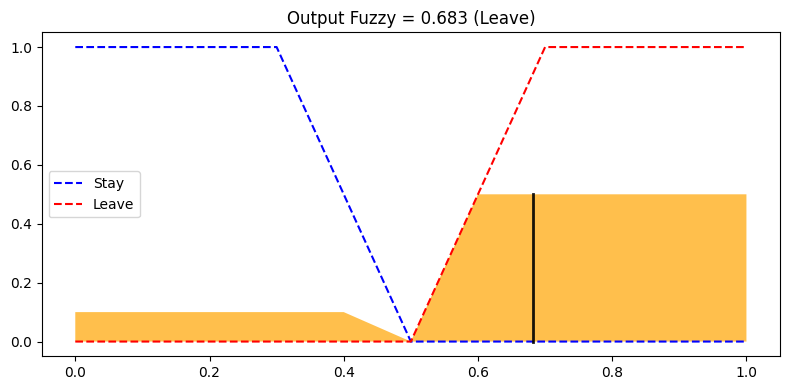

In [ ]:
# Ambil data dari baris ke-0
age = df.loc[0, 'AGE']
bt = df.loc[0, 'BusinessTravel']
hr = df.loc[0, 'HourlyRate']
ot = df.loc[0, 'OverTime']

# Panggil fungsi untuk baris itu saja
output, kategori, aggregated = fuzzy_predict(age, bt, hr, ot)

# Visualisasi
attr_activation = fuzz.interp_membership(x_Attr, aggregated, output)

fig, ax0 = plt.subplots(figsize=(8, 4))
ax0.plot(x_Attr, attr_stay, 'b', linestyle='--', label='Stay')
ax0.plot(x_Attr, attr_leave, 'r', linestyle='--', label='Leave')
ax0.fill_between(x_Attr, np.zeros_like(x_Attr), aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([output, output], [0, attr_activation], 'k', linewidth=2, alpha=0.9)
ax0.set_title(f'Output Fuzzy = {output:.3f} ({kategori})')
ax0.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 1. Konversi hasil fuzzy ke DataFrame
df_output = pd.DataFrame(hasil)  # hasil = list hasil dari fuzzy_predict

# 2. Gabungkan dengan data asli
df_hasil = pd.concat([df, df_output], axis=1)

# 3. Simpan ke file CSV
df_hasil.to_csv("hasil_ffffuzzy_output.csv", index=False)

print("✅ Hasil fuzzy berhasil disimpan ke 'hasil_fuzzy_output.csv'")

✅ Hasil fuzzy berhasil disimpan ke 'hasil_fuzzy_output.csv'
